In [118]:
import numpy  as np
import pandas as pd
import datetime

In [123]:
def convert_snow(cm):
    if cm == '':
        return np.nan
    if cm == '997':
        return 0.5     # broken snow cover < 1 cm
    if cm == '998':
        return 1.0     # broken snow cover >= 1 cm
    if cm == '999':
        return np.nan  # snowdunes
    return float(cm)

df = pd.read_csv(
    'neerslaggeg_ASSEN_140.txt',
    skiprows=24,
    skipinitialspace=True,
    header=None,
    names=['station', 'date', 'rain', 'snow', 'empty'],
    usecols=['date', 'rain', 'snow'],
    parse_dates=['date'],
    na_values={
        'snow': ['999']
    },
    converters={
        'snow': convert_snow
    }
)

In [124]:
df[:10]

,date,rain,snow
0,1951-01-01,0,NaN
1,1951-01-02,45,NaN
2,1951-01-03,25,NaN
3,1951-01-04,3,NaN
4,1951-01-05,60,NaN
5,1951-01-06,100,NaN
6,1951-01-07,64,NaN
7,1951-01-08,28,NaN
8,1951-01-09,81,NaN
9,1951-01-10,48,NaN


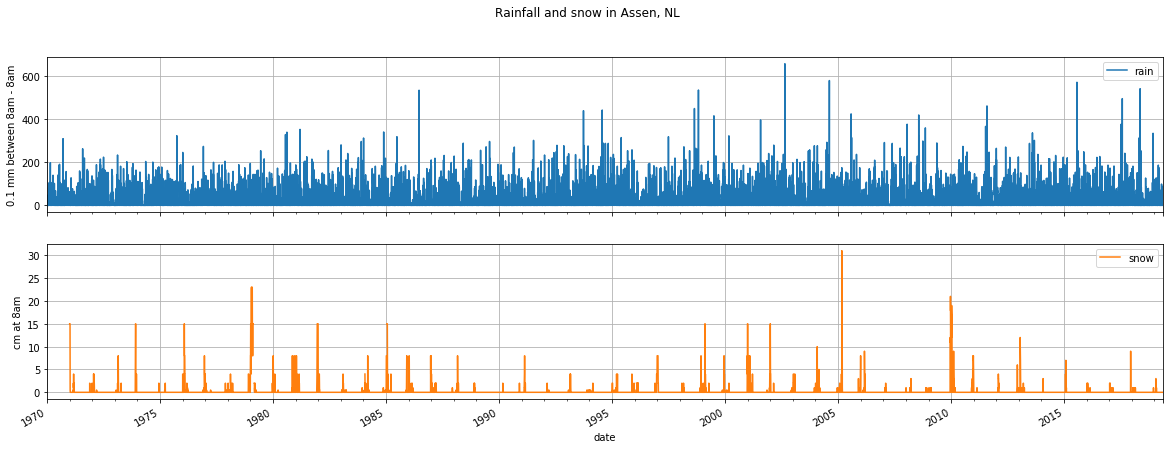

In [131]:
axes = df[
    df['date'] >= datetime.datetime(1970, 1, 1)
].plot(
    title='Rainfall and snow in Assen, NL',
    x='date',
    y=['rain', 'snow'],
    subplots=True,
    grid=True,
    figsize=(20, 7)
)
axes[0].set_ylabel('0.1 mm between 8am - 8am')
axes[1].set_ylabel('cm at 8am')
None

In [152]:
def winter(year, ymax=25):
    df[
        df['date'].between(
            datetime.datetime(year - 1, 11, 1),
            datetime.datetime(year,  4, 1)
        )
    ].plot(
        title=f"Snow, winter {year}",
        x='date',
        y='snow',
        ylim=(0, ymax),
        grid=True,
        figsize=(20, 4)
    ).set_ylabel('cm at 8am')

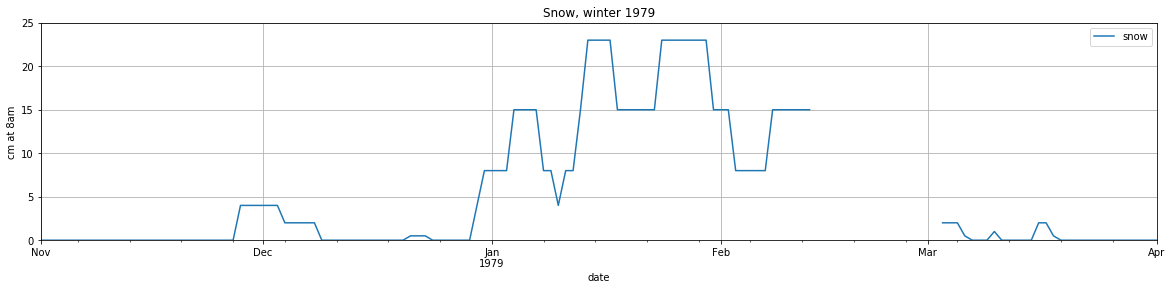

In [153]:
winter(1979)

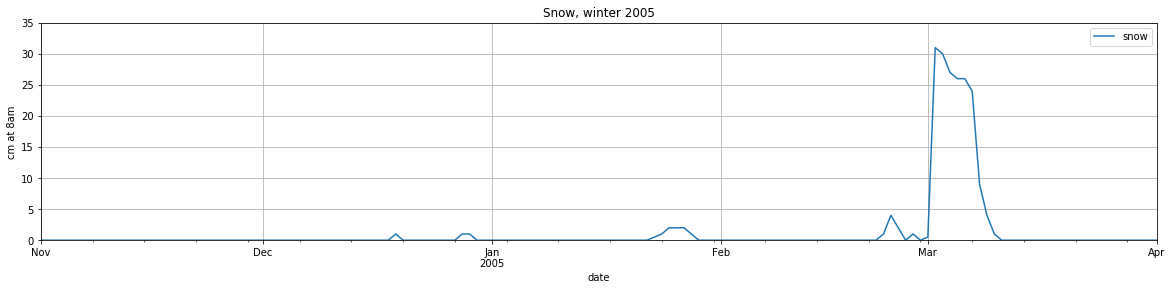

In [160]:
winter(2005, ymax=35)

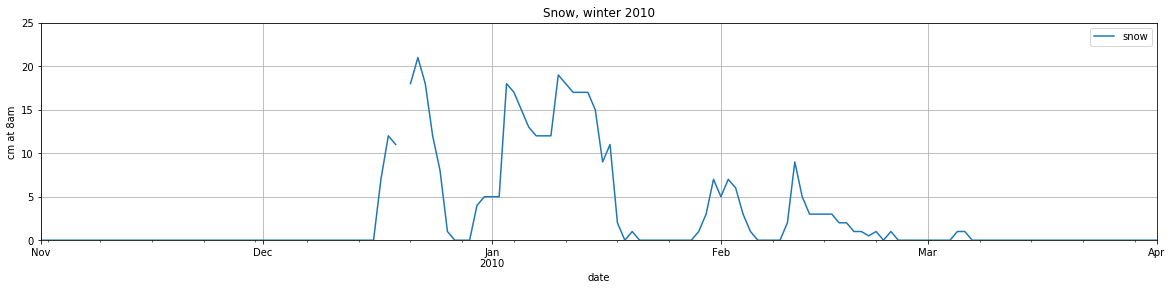

In [154]:
winter(2010)

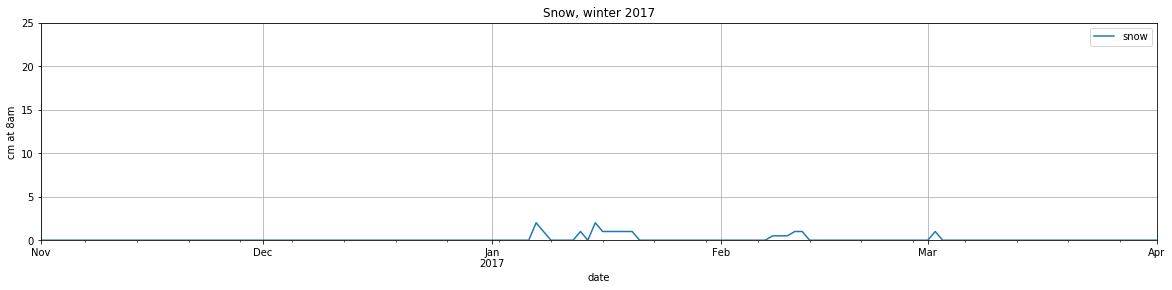

In [157]:
winter(2017)

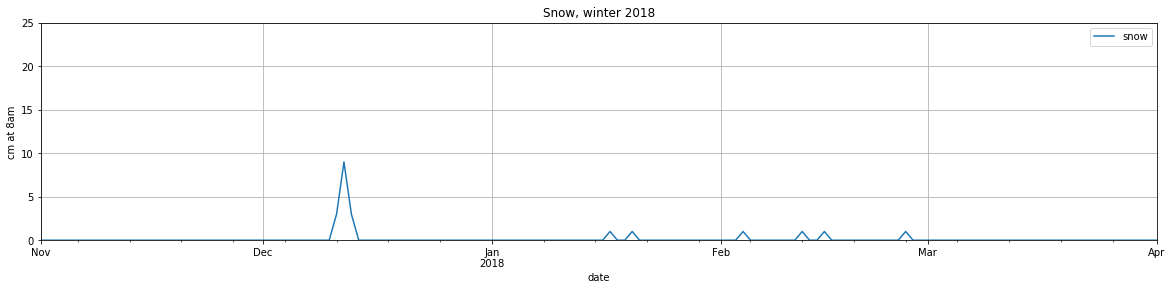

In [156]:
winter(2018)

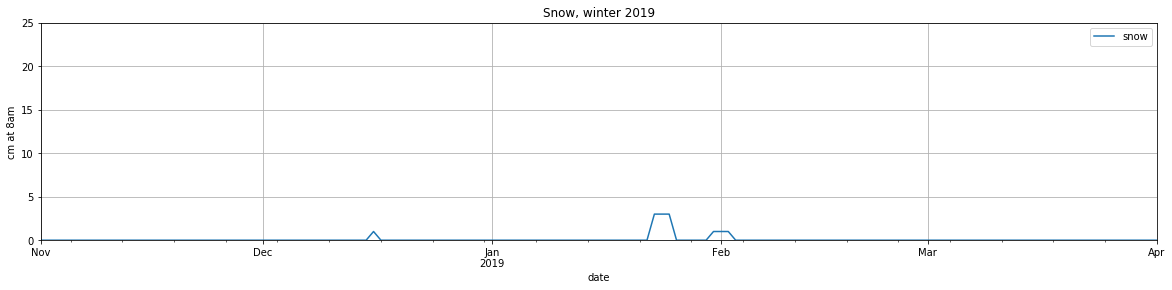

In [155]:
winter(2019)

In [177]:
def rain(year, ymax=600):
    a = datetime.datetime(year, 1,   1)
    b = datetime.datetime(year, 12, 31)
    df[
        df['date'].between(a, b)
    ].plot(
        title=f"Rain {year}",
        x='date',
        y='rain',
        xlim=(a, b),
        ylim=(0, ymax) if ymax else None,
        grid=True,
        figsize=(20, 4)
    ).set_ylabel('0.1 mm between 8am - 8am')

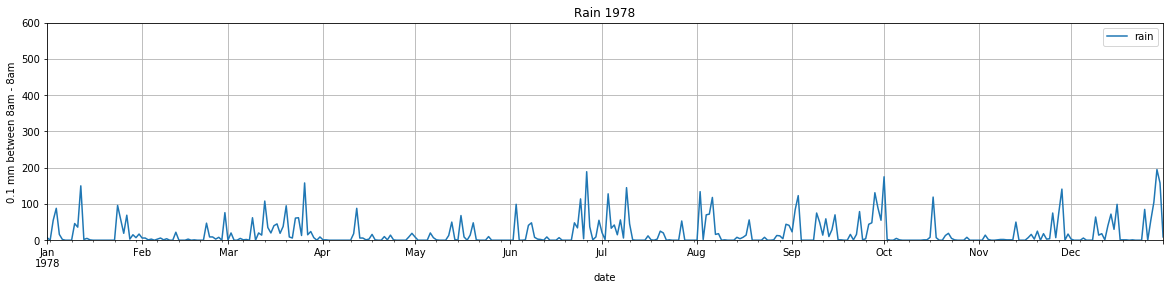

In [178]:
rain(1978)

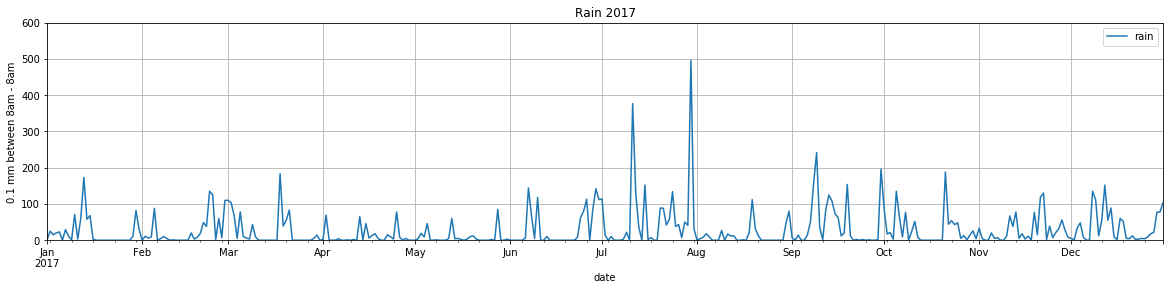

In [179]:
rain(2017)

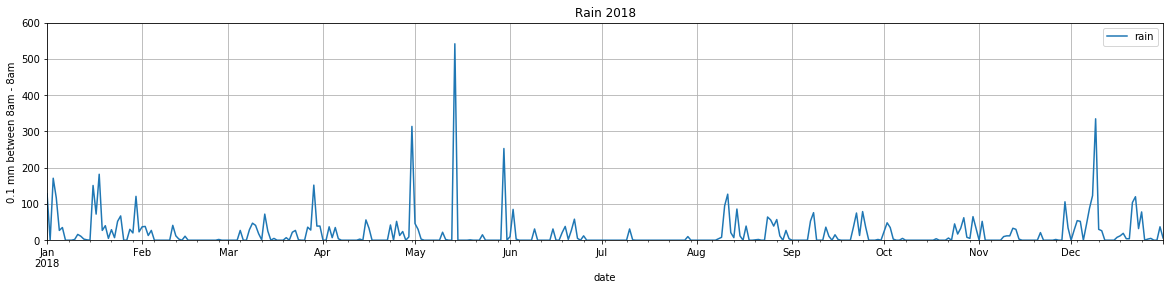

In [180]:
rain(2018)

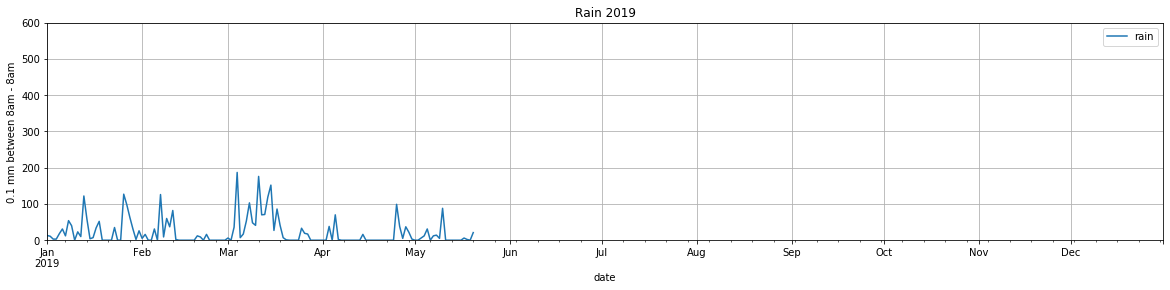

In [182]:
rain(2019)